In [4]:
import numpy as np
from numpy import pi
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from cosmocalc import cosmocalc

In [5]:
c = 3.e8
c_over_H0_Mpc = 4283.
f0_21_Hz = 1420.e6
lamda0_IR_m = 120.e-9

In [12]:
def draw_2D_kspace(z,Deltaz,Nf,theta_fov_rad,Nperp,col,label,grid=True):
    WM,WV = 0.27,0.73
    Ez = np.sqrt(WM*(1+z)**3+WV)
    
    D = cosmocalc(z,WM=WM,WV=WV)['DCMR_Mpc']
    DeltaD = c_over_H0_Mpc*Deltaz/Ez
    
    dkpara = 2.*pi/DeltaD
    kparamax = Nf/2*dkpara

    dkperp = 2.*pi/(theta_fov_rad*D)
    kperpmax = Nperp/2*dkperp

    wedgeslope = D*Ez/(c_over_H0_Mpc*(1+z))*(pi/2)
    
    plt.loglog([dkperp,kperpmax,kperpmax,dkperp,dkperp],[dkpara,dkpara,kparamax,kparamax,dkpara],col,lw=3,label=label)
    
    if grid:
        for i in range(min(Nf/2,10)):
            plt.plot([dkperp,kperpmax],[i*dkpara,i*dkpara],color=col,lw=1)
        for j in range(10):
            plt.plot([j*dkperp,j*dkperp],[dkpara,kparamax],color=col,lw=1)

    plt.loglog([1.e-4,1.e4],[1.e-4*wedgeslope,1.e4*wedgeslope],'k',lw=2)

In [7]:
currplotindex = 1
def p(nrows,ncols,z,Deltaz,theta_fov_deg,dtheta_amin,R_IR,showlegend=False):
    
    df_21_Hz = 250.e3
    dz_21 = (1+z)*df_21_Hz/f0_21_Hz
    Nf_21 = int(Deltaz / dz_21)
    
    theta_fov_rad = theta_fov_deg*pi/180.
    dtheta_rad = dtheta_amin/60.*pi/180.
    Nperp_21 = int(theta_fov_rad/dtheta_rad)
    
    dz_IR = (1+z)/R_IR
    Nf_IR = int(Deltaz / dz_IR)
    
    global currplotindex
    print(nrows,ncols,currplotindex)
    plt.subplot(nrows,ncols,currplotindex)
    
    draw_2D_kspace(z,Deltaz,Nf_21,theta_fov_rad,Nperp_21,'#6699ff','21cm')
    draw_2D_kspace(z,Deltaz,Nf_IR,theta_fov_rad,Nperp_21,'#aa00aa','IR')

    plt.ylim([.01,10])
    plt.xlim([.001,2])
    if (currplotindex-1)%ncols == 0:
        plt.ylabel('$k_\parallel$')
    else:
        plt.gca().yaxis.set_ticklabels([])
        
    if currplotindex > nrows*ncols-ncols:
        plt.xlabel('$k_\perp$')
    else:
        plt.gca().xaxis.set_ticklabels([])
    
    plt.title("$\Delta$z=%1.1f, R=%d, %d$^\circ$, %d'"%(Deltaz,R_IR,theta_fov_deg,dtheta_amin))
    if currplotindex == 1: plt.legend(fontsize=14)
        
    currplotindex += 1


(6, 2, 1)
(6, 2, 2)
(6, 2, 3)
(6, 2, 4)
(6, 2, 5)
(6, 2, 6)
(6, 2, 7)
(6, 2, 8)
(6, 2, 9)
(6, 2, 10)
(6, 2, 11)
(6, 2, 12)


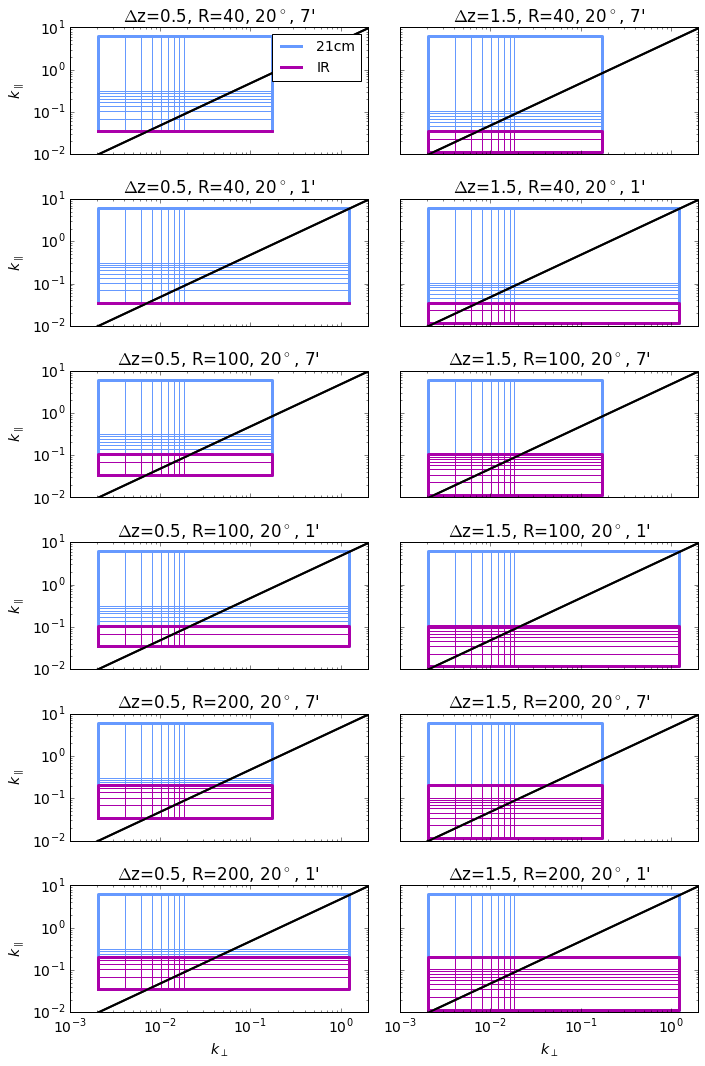

In [33]:
matplotlib.rcParams.update({'font.size': 14})
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
plt.figure(figsize=(10,15))

nrows,ncols = 6,2
currplotindex = 1

p(nrows,ncols, z=7., Deltaz=0.5, theta_fov_deg=20, dtheta_amin=7., R_IR=40)
p(nrows,ncols, z=7., Deltaz=1.5, theta_fov_deg=20, dtheta_amin=7., R_IR=40)

p(nrows,ncols, z=7., Deltaz=0.5, theta_fov_deg=20, dtheta_amin=1, R_IR=40)
p(nrows,ncols, z=7., Deltaz=2, theta_fov_deg=20, dtheta_amin=1, R_IR=40)

p(nrows,ncols, z=7., Deltaz=0.5, theta_fov_deg=20, dtheta_amin=7., R_IR=100)
p(nrows,ncols, z=7., Deltaz=2, theta_fov_deg=20, dtheta_amin=7., R_IR=100)

p(nrows,ncols, z=7., Deltaz=0.5, theta_fov_deg=20, dtheta_amin=1, R_IR=100)
p(nrows,ncols, z=7., Deltaz=2, theta_fov_deg=20, dtheta_amin=1, R_IR=100)

p(nrows,ncols, z=7., Deltaz=0.5, theta_fov_deg=20, dtheta_amin=7., R_IR=200)
p(nrows,ncols, z=7., Deltaz=2, theta_fov_deg=20, dtheta_amin=7., R_IR=200)

p(nrows,ncols, z=7., Deltaz=0.5, theta_fov_deg=20, dtheta_amin=1, R_IR=200)
p(nrows,ncols, z=7., Deltaz=2, theta_fov_deg=20, dtheta_amin=1, R_IR=200)


plt.tight_layout()
plt.savefig('kspace_overlap_grid.pdf',bbox_inches='tight')

In [245]:
def draw_2D_kspace2(z,Deltaz,Nf,theta_fov_rad,Nperp,col,label,R):
    WM,WV = 0.27,0.73
    Ez = np.sqrt(WM*(1+z)**3+WV)
    
    D = cosmocalc(z,WM=WM,WV=WV)['DCMR_Mpc']
    DeltaD = c_over_H0_Mpc*Deltaz/Ez
    
    dkpara = 2.*pi/DeltaD
    kparamax = float(Nf)/2*dkpara

    dkperp = 2.*pi/(theta_fov_rad*D)
    kperpmax = float(Nperp)/2*dkperp

    wedgeslope = D*Ez/(c_over_H0_Mpc*(1+z))*(pi/2)
    
    plt.loglog([dkperp,kperpmax,kperpmax,dkperp,dkperp],[dkpara,dkpara,kparamax,kparamax,dkpara],col,lw=3,label=label)
    
#     nbinlines = 10
#     for i in range(min(Nf/2,nbinlines)):
#         plt.plot([dkperp,kperpmax],[i*dkpara,i*dkpara],'-',color=col,lw=1)
#     for j in range(nbinlines):
#         plt.plot([j*dkperp,j*dkperp],[dkpara,kparamax],'-',color=col,lw=1)

    plt.text(.06,.9*dkpara,'$\Delta$ z=%1.1f'%Deltaz,horizontalalignment='center',verticalalignment='top',fontsize=16,color=col)
    plt.text(.06,1.05*kparamax,'R=%d'%R,horizontalalignment='center',verticalalignment='bottom',fontsize=16,color=col)
    plt.text(kperpmax,np.sqrt(dkpara*kparamax)," %d'"%np.round(theta_fov_rad/Nperp*180*60/np.pi),horizontalalignment='left',verticalalignment='center',fontsize=16,color=col)
    plt.text(dkperp,np.sqrt(dkpara*kparamax),'%d$^\circ$ '%np.round(theta_fov_rad*180/np.pi),horizontalalignment='right',verticalalignment='center',fontsize=16,color=col)

    wedgelabel='' if Deltaz>1 else 'Horizon wedge'
    plt.loglog([1.e-4,1.e4],[1.e-4*wedgeslope,1.e4*wedgeslope],'k:',lw=2,label=wedgelabel)
    plt.title('z=%d'%z)
    
def p2(z,Deltaz,theta_fov_deg,dtheta_amin,R_IR,col,label):    
    theta_fov_rad = theta_fov_deg*pi/180.
    dtheta_rad = dtheta_amin/60.*pi/180.
    Nperp_21 = int(theta_fov_rad/dtheta_rad)
    
    dz_IR = (1+z)/R_IR
    Nf_IR = int(np.round(Deltaz / dz_IR))
        
    draw_2D_kspace2(z,Deltaz,Nf_IR,theta_fov_rad,Nperp_21,col,label,R_IR)

    plt.ylim([.005,.2])
    plt.xlim([.0001,3])
    h=plt.ylabel('$k_\parallel$')
    h.set_rotation(0)
    plt.xlabel('$k_\perp$')

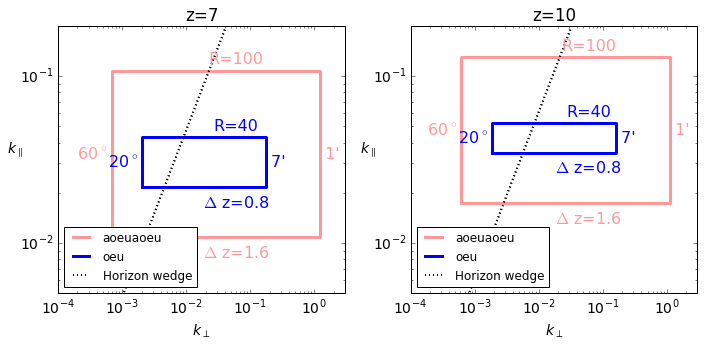

In [246]:
plt.figure(figsize=(10,5))
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
matplotlib.rcParams.update({'font.size': 14})

gray='#ff9999'
plt.subplot(121)
p2(z=7., Deltaz=1.6, theta_fov_deg=60., dtheta_amin=1., R_IR=100,col=gray,label='aoeuaoeu')
p2(z=7., Deltaz=.8, theta_fov_deg=20., dtheta_amin=7., R_IR=40,col='b',label='oeu')
plt.legend(loc=3,fontsize=12)

plt.subplot(122)
p2(z=10., Deltaz=1.6, theta_fov_deg=60., dtheta_amin=1., R_IR=100,col=gray,label='aoeuaoeu')
p2(z=10., Deltaz=.8, theta_fov_deg=20., dtheta_amin=7., R_IR=40,col='b',label='oeu')
plt.legend(loc=3,fontsize=12)

plt.tight_layout()
plt.savefig('kspace_overlap.pdf',bbox_inches='tight')